In [12]:
# Install the transformers library if you haven't already
! pip install transformers

import torch
from transformers import BertTokenizer, BertModel

In [13]:
# Load pre-trained model tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode text
d1 = "Kiwi, mango, and papaya"
d2 = "Kiwi is a flightless bird"
d3 = "a rooster cannot take wing"
d4 = "apple, oranges and grapes"

text = [d1, d2, d3, d4]

encoding = tokenizer.batch_encode_plus( text,# List of input texts
    padding=True,              # Pad to the maximum sequence length
    truncation=True,           # Truncate to the maximum sequence length if necessary
    return_tensors='pt',      # Return PyTorch tensors
    add_special_tokens=True    # Add special tokens CLS and SEP
)

input_ids = encoding['input_ids']  # Tokenized and encoded sentences
attention_mask = encoding['attention_mask']  # Attention mask

# Generate embeddings using BERT model

model = BertModel.from_pretrained('bert-base-uncased')

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    sentence_embedding = outputs.last_hidden_state.mean(dim=1)

print(sentence_embedding.shape)
print(sentence_embedding)


torch.Size([4, 768])
tensor([[-0.1823,  0.0977, -0.4640,  ...,  0.0574,  0.1514, -0.6268],
        [-0.2116, -0.0384, -0.4832,  ...,  0.0158,  0.1732, -0.1769],
        [-0.2144, -0.0980, -0.4049,  ...,  0.0680,  0.0817,  0.2444],
        [-0.1813,  0.2382, -0.2166,  ..., -0.3259,  0.2408, -0.4830]])


[1 0 0 1]


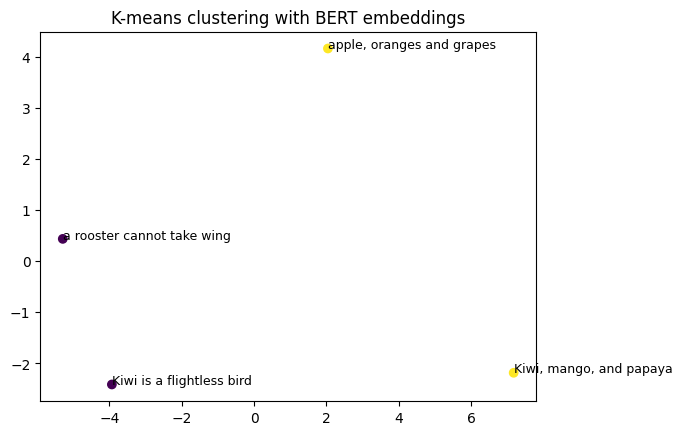

In [14]:
# doing kmeans clustering

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=2, random_state=0).fit(sentence_embedding)
print(kmeans.labels_)

# do pca for visualization


pca = PCA(n_components=2)
pca.fit(sentence_embedding)
pca_embedding = pca.transform(sentence_embedding)

color_map = {0: 'r', 1: 'g'}

plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=kmeans.labels_)

# Add labels to each point
for i, label in enumerate(text):
    plt.text(pca_embedding[i, 0], pca_embedding[i, 1], label, fontsize=9)

plt.title('K-means clustering with BERT embeddings')
plt.show()

(4, 14)
[1 1 0 1]


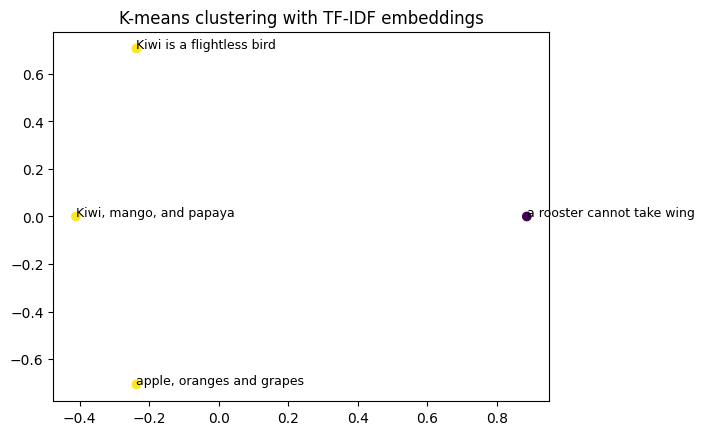

In [15]:
# comput tfidf representation of the text

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)
print(X.shape)

# doing kmeans clustering

kmeans = KMeans(n_clusters=2, random_state=0).fit(X.toarray())
print(kmeans.labels_)

# do pca for visualization

pca = PCA(n_components=2)
pca.fit(X.toarray())
pca_embedding = pca.transform(X.toarray())

plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=kmeans.labels_)

# Add labels to each point
for i, label in enumerate(text):
    plt.text(pca_embedding[i, 0], pca_embedding[i, 1], label, fontsize=9)

plt.title('K-means clustering with TF-IDF embeddings')
plt.show()

(4, 782)


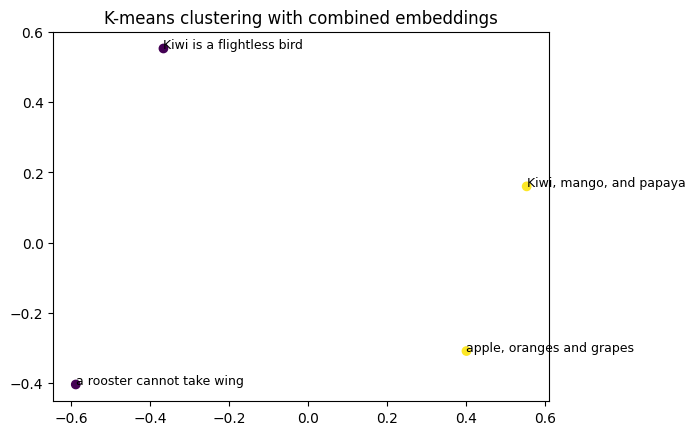

In [17]:
alpha_1 = 1/len(sentence_embedding[0])**0.5
alpha_2 = 1/len(X.toarray()[0])**0.5

import numpy as np
# Combine BERT and TF-IDF embeddings
combined_embedding = np.concatenate([(alpha_1)*sentence_embedding, (alpha_2)*X.toarray()], axis=1)

print(combined_embedding.shape)
# doing kmeans clustering

row_norms = np.linalg.norm(combined_embedding, axis=1)
combined_embedding = combined_embedding / row_norms[:, np.newaxis]
kmeans = KMeans(n_clusters=2, random_state=0).fit(combined_embedding)

# do pca for visualization

pca = PCA(n_components=2)
pca.fit(combined_embedding)
pca_embedding = pca.transform(combined_embedding)

plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=kmeans.labels_)
# Add labels to each point
for i, label in enumerate(text):
    plt.text(pca_embedding[i, 0], pca_embedding[i, 1], label, fontsize=9)

plt.title('K-means clustering with combined embeddings')

plt.show()